# WeatherPy

## Analysis
* Relationship of Temperature and Latitude Position: The data decisively reveals what has been known since antiquity that regions closer to the equator of the Earth are warmer. This linear relationship is best revealed by using absolute latitudes. However, this approach does mask the apparent non-linear relationship of extreme latitutdes influencing temperatures in the southern hemisphere more than the northern hemisphere. This could be explained due to a few things. The first is that there are less cities in the southern hemisphere than in the north (due to both land surface area being lower and diasporic consequences of human migration).
* Relationships of Cloudiness, Humidity, and Wind Speed are decidedly non-linear, and likely not influenced by latitude. In the case of humidity, there is a strong distribution across all humidities for positive and negative latitudes. There does appear to be a higher density of 100% humidity cities within 20 degrees of the equator, but abundant data suggest there are non-humid cities right on the equator. Windspeed also has no immediate trends based on latitude except that there appears to be a general rise in wind speed when traveling further north in the hemisphere. This could be due to the terrain influencing wind speed as steppes, tundras, and other flatlands would experience higher wind speeds. Overall, these can be fairly well explained by an understanding that temperature is largely dependent on ability of the area to receive sun radiation. Wind, humidity, and cloudiness are more complex functions that are themselves influenced by temperature (which cycles due to Earth's tilt and rotations).
* Nature of Cloudiness Data: Interestingly, despite cloud coverage is represented as a percentage, which is a continuous variable, visualization of the data reveals a decidedly categorical nature. Interestingly, although an approximation to the nearest 10% value would probably be good enough, several location report non-10-multiple cloud coverages. It is also worth noting that there are many more places that have no cloud coverage than complete cloud coverage, which makes sense given that cloud's are not permanent bodies and cities reside only on land, whereas if ocean data was included/available, there could be a higher prevalence of cloudy areas.

#### To make cleaning of the data simpler, the citipy library's dataset can be acquired and converted into a dataframe.
#### This allows a simple pandas drop_duplicates method to be used (on lat/long). See the output below the codeblock to see how approx. 30% of the dataset is identical coordinate duplicates
#### Note: this method does *not* account for near-duplicates that will remain in the dataset. By sampling a large number, (e.g. n=1000) from over 2E6 cities, it is unlikely these duplicates will affect visual trends.

In [21]:
import openweathermapy as owm
import pandas as pd
import matplotlib.pyplot as plt
import requests
import random
from config import api_key
import seaborn as sns
#Import list of cities
citydf = pd.read_csv('worldcitiespop.txt',encoding='utf-8',low_memory=False,dtype=str)
print(citydf.info())
#Remove lat/lng duplicates
citydf = citydf.drop(columns=['AccentCity','Region','Population'])
citydf = citydf.drop_duplicates(subset=['Latitude','Longitude'],keep='first')
citydf = citydf.reset_index()
print(citydf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173958 entries, 0 to 3173957
Data columns (total 7 columns):
Country       object
City          object
AccentCity    object
Region        object
Population    object
Latitude      object
Longitude     object
dtypes: object(7)
memory usage: 169.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243854 entries, 0 to 2243853
Data columns (total 5 columns):
index        int64
Country      object
City         object
Latitude     object
Longitude    object
dtypes: int64(1), object(4)
memory usage: 85.6+ MB
None


## Define parameters for querying OWM

In [22]:
settings = {'units':'imperial','APPID':api_key}

## Define the sample size below and add relevant columns to dataframe prior to querying

In [23]:
#Build cities data frame by using pandas sample method
# initial testing will use 50 for expedited 
cities = citydf.sample(1000)
#Add columns for max temp to working dataframe
cities['Max Temp'] = ''
cities['Cloudiness'] = ''
cities['Wind Speed'] = ''
cities['Humidity'] = ''

## Create lists to hold the queried values as the sample is looped over

In [24]:
#Iterate over each row of the dataframe, pulling API data into lists
# both pandas documentation and stackoverflow caution against trying
# to append/modify a dataframe being iterated over
list_of_max_temps = []
list_of_cloud = []
list_of_wind = []
list_of_humidity = []
for row, index in cities.iterrows():
    lat = index['Latitude']
    lng = index['Longitude']
    location = (lat, lng)
    try:
        data = owm.get_current(location,**settings)
        list_of_max_temps.append(data("main.temp_max"))
        list_of_cloud.append(data("clouds.all"))
        list_of_wind.append(data("wind.speed"))
        list_of_humidity.append(data("main.humidity"))
    except:
        raise print("Whoops! Something went wrong, check your lat/long coordinates!")
print('Retrieval of OWM data is finished.')

Retrieval of OWM data is finished.


## Pass the lists into the cities dataframe
#### Note: some lively discussion and timetests online suggest this is a procedurally faster way to add in values than looping and using loc or at methods

In [28]:
#Add the lists of data into the data frame
cities['Max Temp'] = list_of_max_temps
cities['Cloudiness'] = list_of_cloud
cities['Wind Speed'] = list_of_wind
cities['Humidity'] = list_of_humidity

In [29]:
cities.head()

,index,Country,City,Latitude,Longitude,Max Temp,Cloudiness,Wind Speed,Humidity,Latitude(Abs)
1626321,2338488,ro,suesti,44.866667,24.066667,66.20,64,9.17,68,44.866667
1306747,1922917,my,kampong gapis,4.150000,101.9,72.48,88,3.36,99,4.150000
395407,607148,cn,wangjiashan,35.961085,102.90309,52.05,64,2.35,94,35.961085
1018163,1473104,ir,qolqoleh tappeh,36.839900,45.9686,46.65,44,1.57,93,36.839900
1537766,2219449,pk,naru,27.414766,68.660212,86.00,0,4.70,45,27.414766


## Add an "Absolute Latitude" (degrees positive or negative from equator) to better show temperature regression

In [30]:
#Transform Lat values in DF into absolute values now that parsing is done
# note the values were imported as strings to make querying easily
cities['Latitude'] = pd.to_numeric(cities['Latitude'],errors='raise')
cities['Latitude(Abs)'] = abs(cities['Latitude'])
cities.head()

,index,Country,City,Latitude,Longitude,Max Temp,Cloudiness,Wind Speed,Humidity,Latitude(Abs)
1626321,2338488,ro,suesti,44.866667,24.066667,66.20,64,9.17,68,44.866667
1306747,1922917,my,kampong gapis,4.150000,101.9,72.48,88,3.36,99,4.150000
395407,607148,cn,wangjiashan,35.961085,102.90309,52.05,64,2.35,94,35.961085
1018163,1473104,ir,qolqoleh tappeh,36.839900,45.9686,46.65,44,1.57,93,36.839900
1537766,2219449,pk,naru,27.414766,68.660212,86.00,0,4.70,45,27.414766


## Plot the association of max temperature(F) against the city's latitude

[Text(0,0.5,'Max Temp (F)'),
 Text(0.5,0,'Degrees Latitude'),
 Text(0.5,1,'Max Temp(F) of random cities vs. Latitude')]

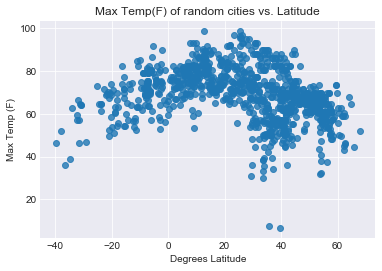

In [31]:
sns.set_style('darkgrid')
temp_ax = sns.regplot(x=cities['Latitude'],y=cities['Max Temp'],fit_reg=False)
temp_ax.set(xlabel='Degrees Latitude',ylabel='Max Temp (F)',title='Max Temp(F) of random cities vs. Latitude')

## Plot the same temperature data against absolute latitude (DO NOT GRADE)
#### Note: While not requested in the homework, this is a vastly better visualization approach in showing the linear relationship we expect with temperature and "closeness" to the equator.

[Text(0,0.5,'Max Temp (F)'),
 Text(0.5,0,'Degrees Lat. from Equator'),
 Text(0.5,1,'Max Temp(F) of random cities vs. Lat. from Equator')]

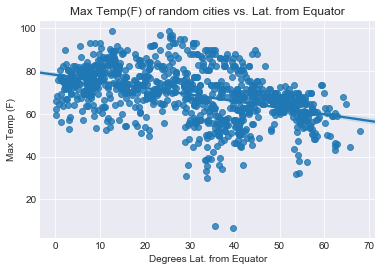

In [32]:
abs_temp_ax = sns.regplot(x=cities['Latitude(Abs)'],y=cities['Max Temp'])
abs_temp_ax.set(xlabel='Degrees Lat. from Equator',ylabel='Max Temp (F)',title='Max Temp(F) of random cities vs. Lat. from Equator')

## Plot Humidity against Latitude

[Text(0,0.5,'Humidity(%)'), Text(0.5,1,'Humidity vs City Latitude')]

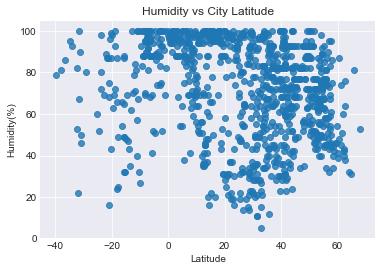

In [33]:
humid_ax = sns.regplot(x=cities['Latitude'],y=cities['Humidity'],fit_reg=False)
humid_ax.set(ylabel='Humidity(%)',title='Humidity vs City Latitude')

## Plot Cloudiness against Latitude

[Text(0,0.5,'Cloudiness(%)'), Text(0.5,1,'Cloudiness vs. City Latitude')]

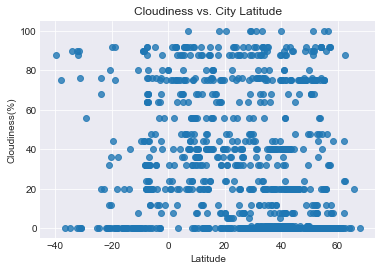

In [34]:
cloud_ax = sns.regplot(x=cities['Latitude'],y=cities['Cloudiness'],fit_reg=False)
cloud_ax.set(ylabel='Cloudiness(%)',title='Cloudiness vs. City Latitude')

## Plot Wind Speed against Latitude

[Text(0,0.5,'Wind Speed (mph)'),
 Text(0.5,1,'Wind Speed (mph) vs City Latitutde')]

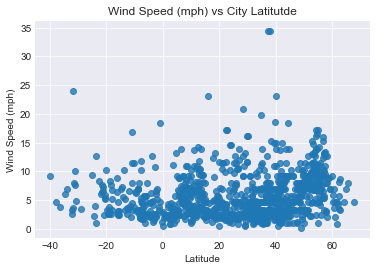

In [35]:
wind_ax = sns.regplot(x=cities['Latitude'],y=cities['Wind Speed'],fit_reg=False)
wind_ax.set(ylabel='Wind Speed (mph)',title='Wind Speed (mph) vs City Latitutde')